# Load Dataset

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay

random_state = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# NG의 수가 6초 단위 177,067개 -> 1분 단위로 묶으면 40,811개
# 고르게 퍼져있는 것이 아니라 특정 분 단위로 집중되어 있는 것을 알 수 있음

df = pd.read_csv('/content/drive/MyDrive/Python/assignment/경진대회용 용해탱크 데이터셋.csv')

In [ ]:
df['NUM'] = df['NUM'].map(lambda x : str((x%10)*6)) # 초로 변경
df['STD_DT'] =df['STD_DT'] + ':' + df['NUM'] # datetime 형식으로 변환 1
df = df.drop(['NUM'], axis = 1)
df['STD_DT'] = df['STD_DT'].apply(lambda x : pd.to_datetime(str(x))) # datetime 형식으로 변환 2
df = df.set_index('STD_DT') # datetime을 index로 설정


In [ ]:
TAG_map = {'OK' : 0, 'NG' : 1}

df['TAG'] = df['TAG'].map(TAG_map) # TAG column의 값이 0이면 OK, 1이면 NG

# 1. 시계열 패턴 (계절성) 분석

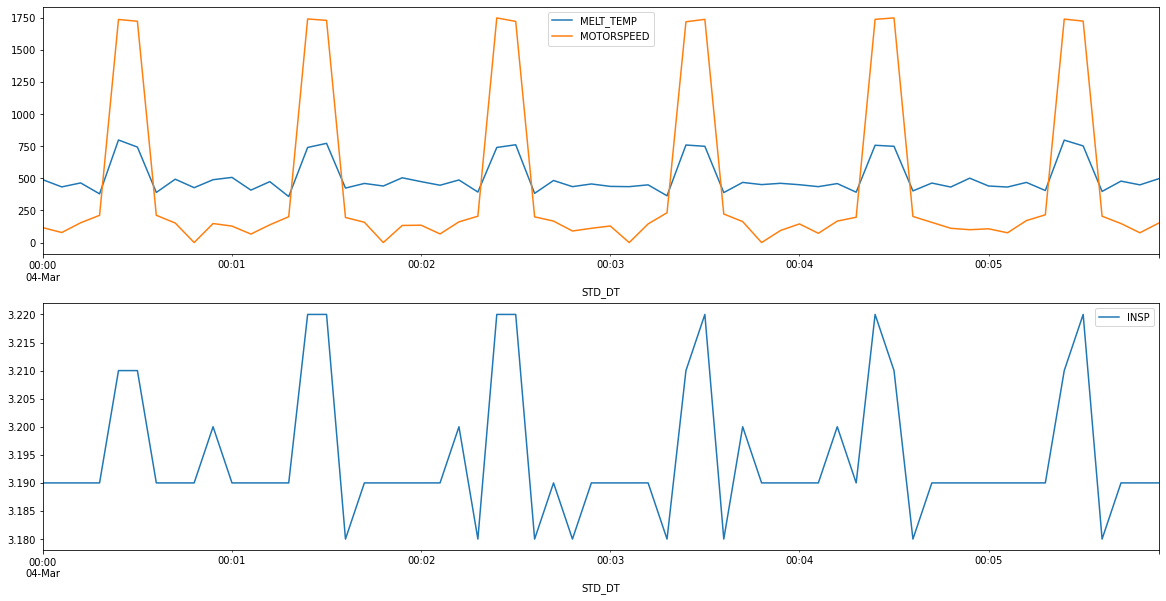

In [ ]:
# 회전, 온도, 수분은 1분 단위의 비슷한 패턴
plt.subplot(211)
df['MELT_TEMP'][0:60].plot(figsize=(20,10))
df['MOTORSPEED'][0:60].plot(figsize=(20,10))
plt.legend()

# INSP는 scale의 차이가 커 별도의 그래프로 표기
plt.subplot(212)
df['INSP'][0:60].plot(figsize=(20,10))
plt.legend()

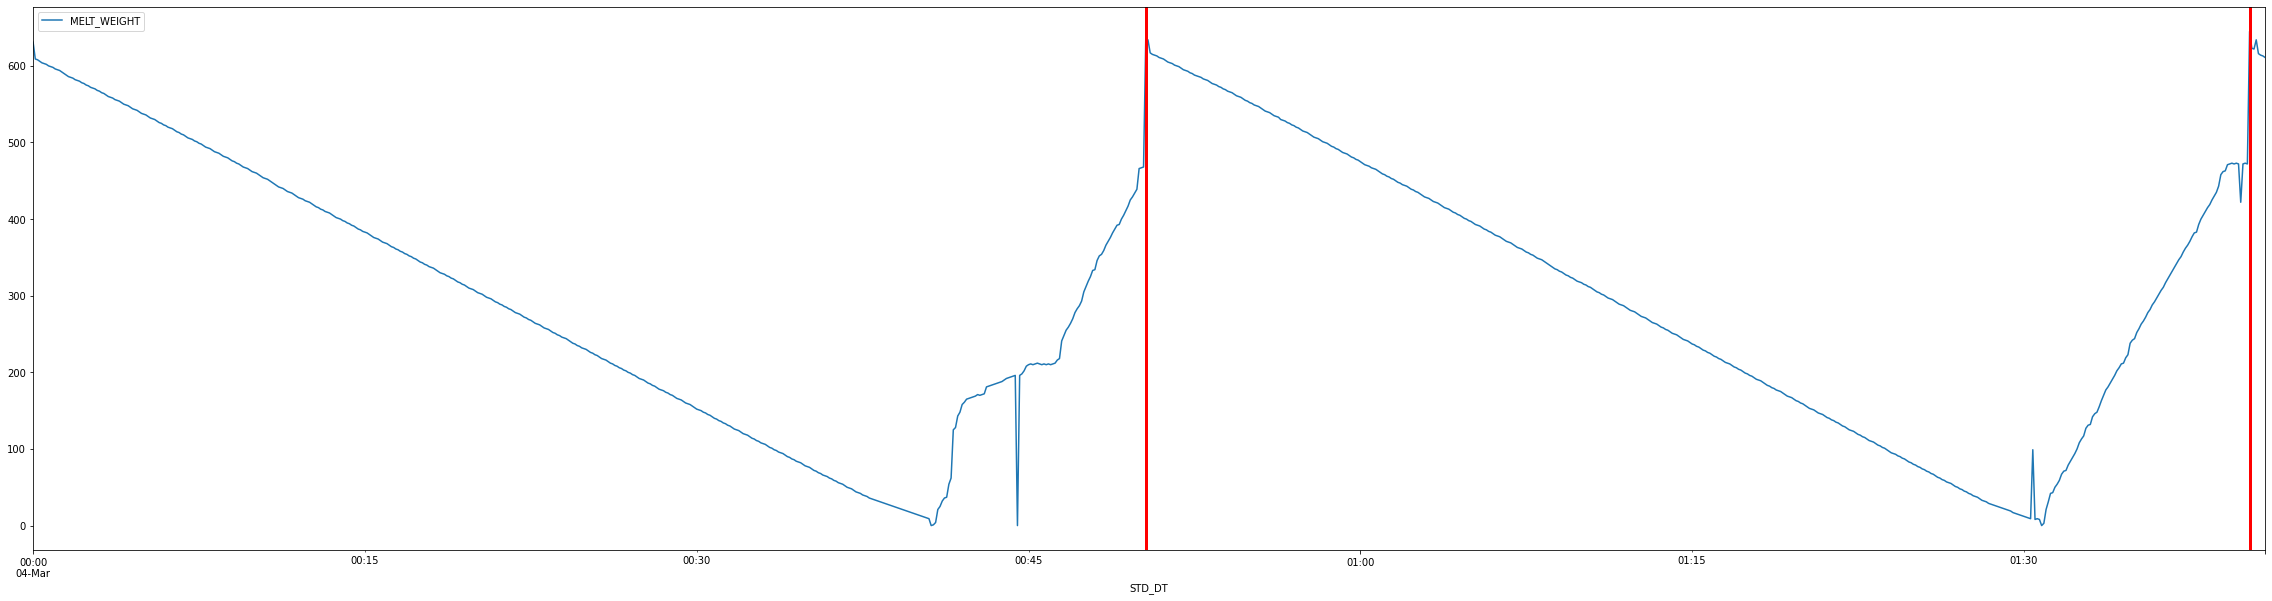

1st peak: 2020-03-04 00:50:18
2nd peak: 2020-03-04 01:40:12


In [ ]:
#무게는 40분 동안 감소 10분동안 증가 (정확히 50분 간격은 아님)

df['MELT_WEIGHT'][0:1010].plot(figsize=(40,10))
plt.legend()

plt.axvline(df.index[503], 0, 1, color='red', linestyle='solid', linewidth=3)
plt.axvline(df.index[1002], 0, 1, color='red', linestyle='solid', linewidth=3)
plt.show()

print('1st peak: ' + str(df.index[503]))
print('2nd peak: ' + str(df.index[1002]))

# 2. 분 단위 시계열 패턴 (계절성) 분석

In [ ]:
minutely_df = df.resample('1T').mean() # 값은 평균을 사용
df_m = pd.DataFrame(minutely_df)

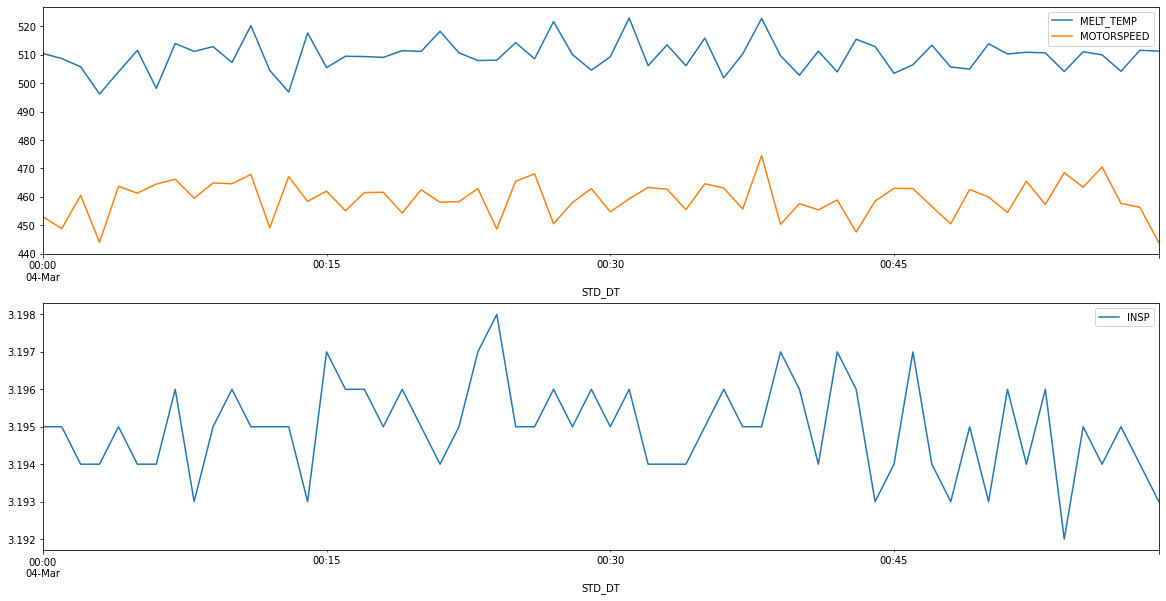

In [ ]:
# 패턴이 많이 사라진 모습
plt.subplot(211)
df_m['MELT_TEMP'][0:60].plot(figsize=(20,10))
df_m['MOTORSPEED'][0:60].plot(figsize=(20,10))
plt.legend()

plt.subplot(212)
df_m['INSP'][0:60].plot(figsize=(20,10))
plt.legend()


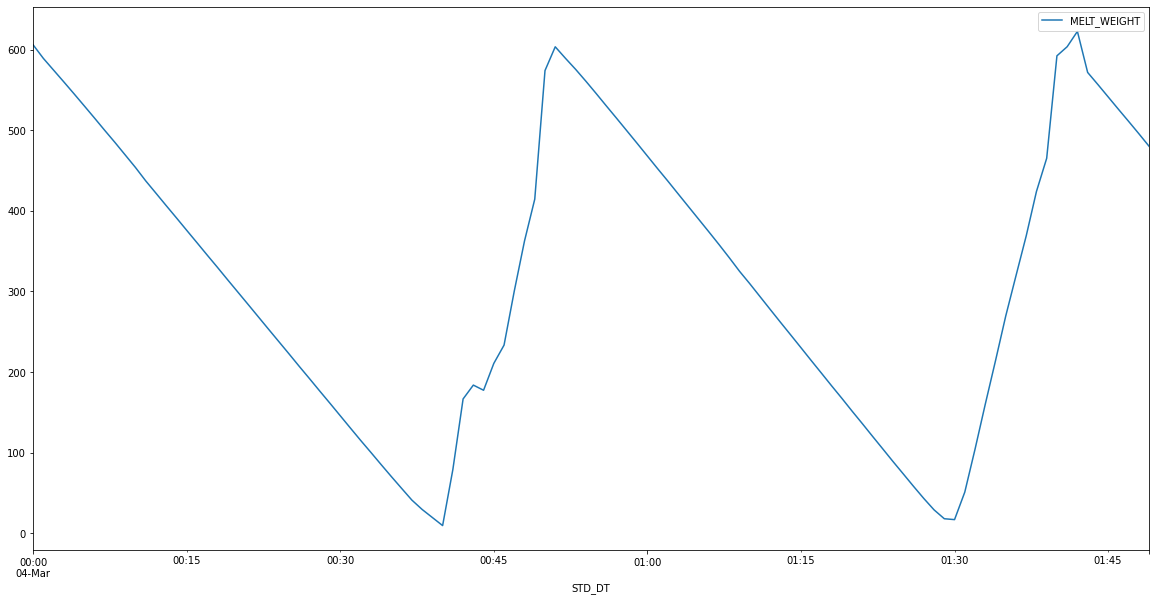

In [ ]:
#무게는 40분 동안 감소 10분동안 증가 (정확히 50분 간격은 아님)

df_m['MELT_WEIGHT'][0:110].plot(figsize=(20,10))
plt.legend()

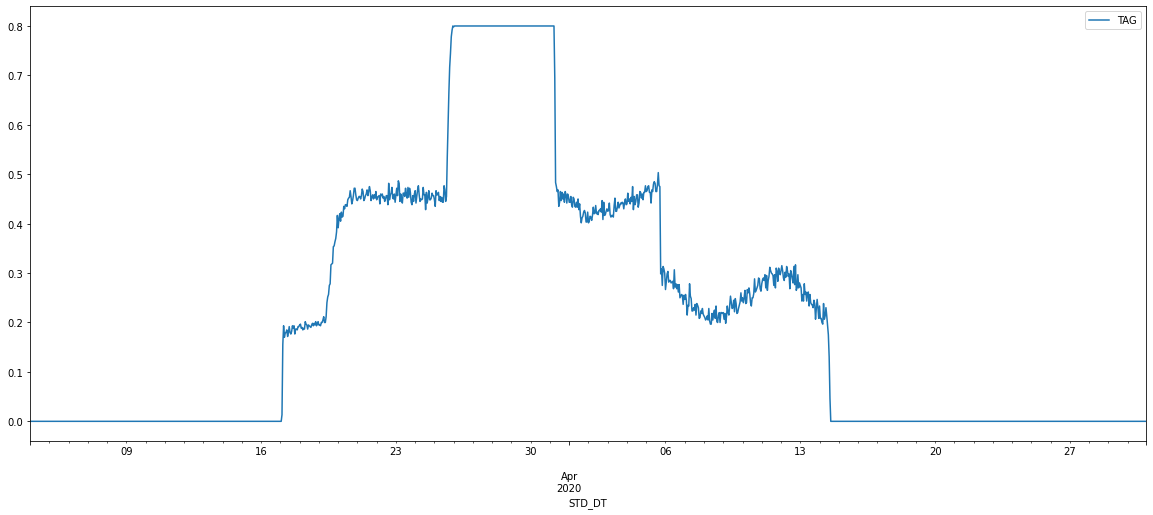

In [ ]:
# 종속변수는 분 단위의 계절성이 파악되지 않기 때문에 전체 구간의 시간당 불량률을 확인
hourly_df = df.resample('60T').mean()
df_h = pd.DataFrame(hourly_df)

df_h['TAG'].plot(figsize=(20,8))
plt.legend()

# 3. 차분

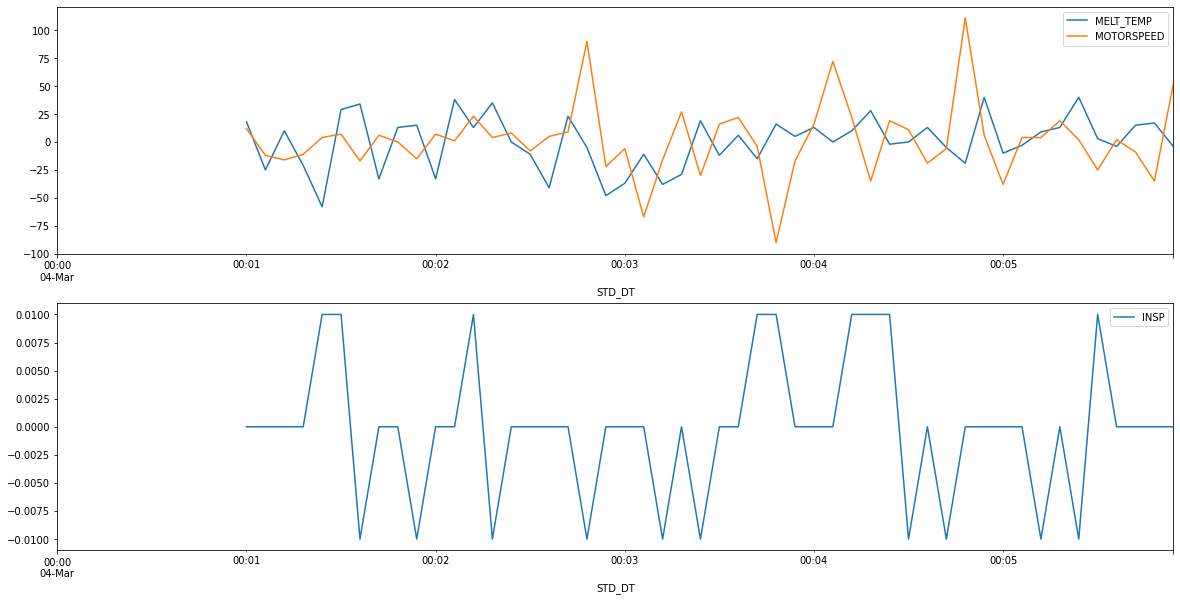

In [ ]:
# 종속변수에는 분 단위의 계절성이 없지만
# 독립변수에는 분 단위의 계절성이 있기 때문에 분 단위의 계절성을 줄이기 위해 차분하였을 때의 값 확인

plt.subplot(211)
df['MELT_TEMP'][0:60].diff(10).plot(figsize=(20,10))
df['MOTORSPEED'][0:60].diff(10).plot(figsize=(20,10))
plt.legend()

plt.subplot(212)
df['INSP'][0:60].diff(10).plot(figsize=(20,10))
plt.legend()